# datenanalyse

In [80]:
# Ausführen, für den Fall, dass  Warnungen ignoriert werden sollen
import warnings
warnings.filterwarnings('ignore')

In [50]:

# bibliotheken importieren:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline


In [51]:

# daten holen:
df = pd.read_csv("Mall_Customers.csv")


In [52]:

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [53]:

# alle unterschiedliche werte:
df.nunique()


CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [54]:

# nullwerte:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

C:\Users\dietm\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


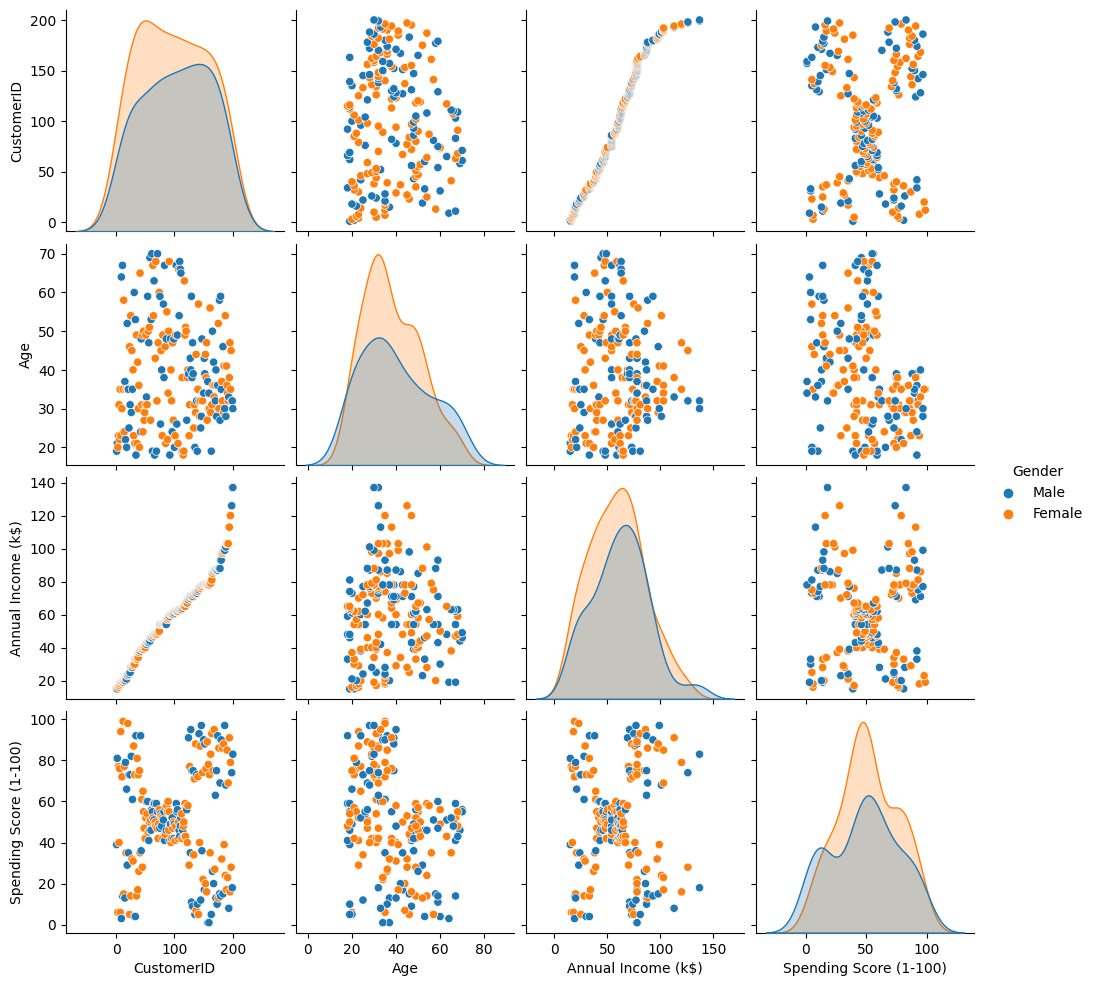

In [55]:

# z.t. 5 cluster zu erkennen:
sns.pairplot(df,hue="Gender")


<Axes: xlabel='Gender', ylabel='count'>

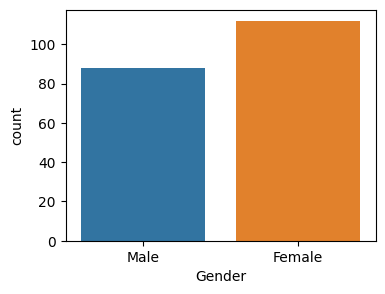

In [56]:
plt.figure(figsize=(4,3))
# verhältnis männer - frauen:
sns.countplot(x="Gender",data=df,)


In [57]:

#max-min-werte:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Count'>

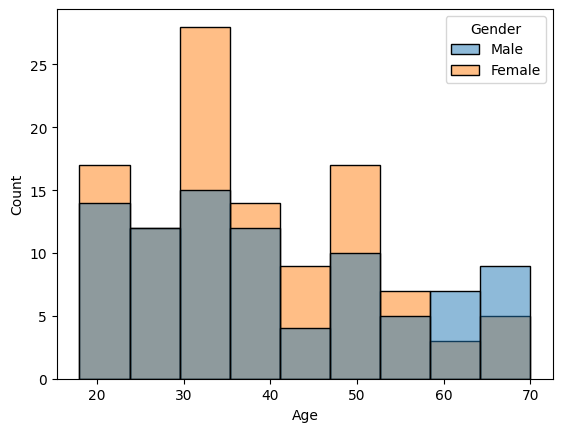

In [58]:

sns.histplot(data=df,x="Age",hue="Gender")


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

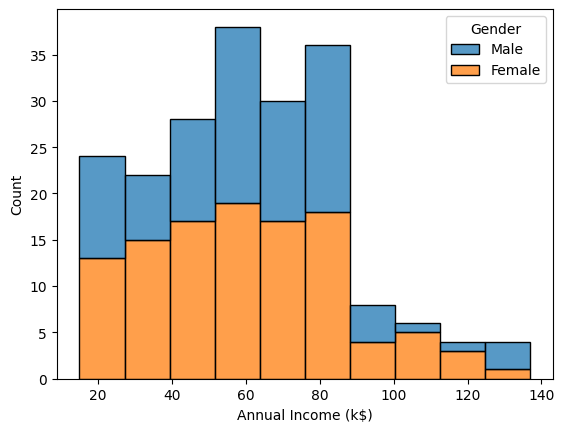

In [59]:

sns.histplot(data=df,x="Annual Income (k$)",hue="Gender",multiple="stack")


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

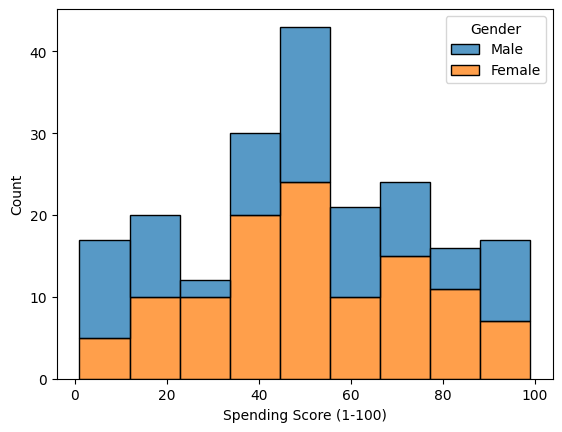

In [60]:

sns.histplot(data=df,x="Spending Score (1-100)",hue="Gender",multiple="stack")


<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

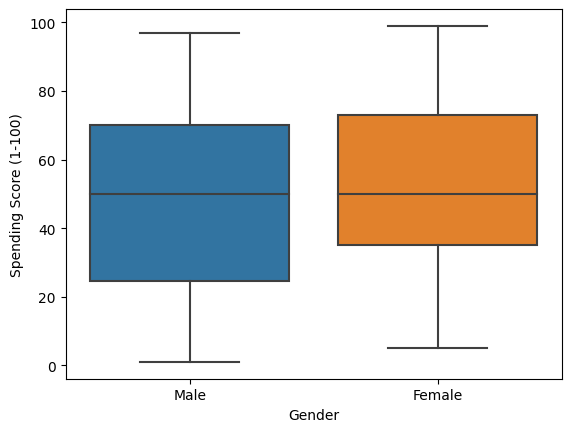

In [61]:

# verteilung im durchschnittlichen wert:
sns.boxplot(data=df,x="Gender",y="Spending Score (1-100)")


<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

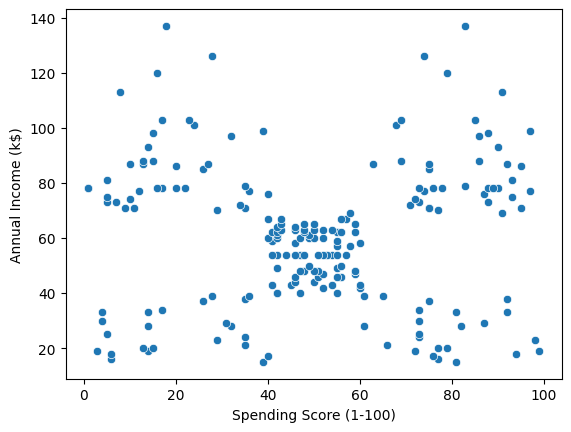

In [62]:

# verteilung --> ansammlungen: 5
sns.scatterplot(data=df,x="Spending Score (1-100)",y="Annual Income (k$)")



# modell bauen --> interpretation der ergebnisse


In [63]:

# daten preparieren:
df.drop(["CustomerID"],axis=1,inplace=True)


In [64]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [65]:

# funktion --> geschlecht in werte 0/1
def geschlecht(data):
    if data == "Male":
        return 1
    elif data == "Female":
        return 0


In [66]:

# daten mit funktion abändern
df["Gender"] = df["Gender"].apply(geschlecht)


In [67]:

df


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [68]:

df.nunique()


Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [69]:

# k_mean importieren:
from sklearn.cluster import KMeans


In [70]:

# elbow method:
#             --> inertias (distanzen bzw. fehler)
kmeans_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_k]


C:\Users\dietm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dietm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dietm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dietm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

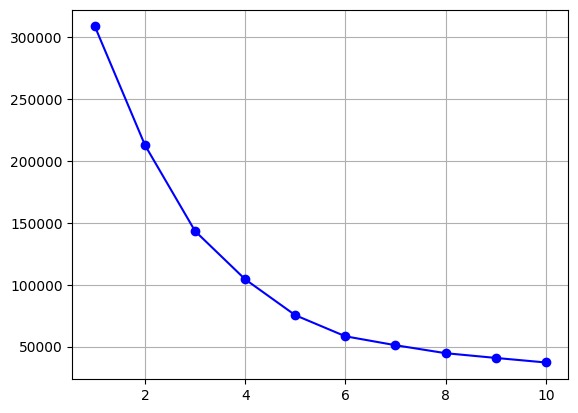

In [78]:

# visualisieren:
plt.grid()
plt.plot(range(1, 11),inertias,"bo-")


In [85]:

# trainieren mit k von elbow-method gewählt 5:
km = KMeans(n_clusters=5,random_state=42)
clusters = km.fit_predict(df)

# neues label mit den vorhergesagten clustern:
df["Label"] = clusters


In [86]:

df.describe()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000,1.850000
std,0.497633,13.969007,26.264721,25.823522,1.294558
min,0.000000,18.000000,15.000000,1.000000,0.000000
25%,0.000000,28.750000,41.500000,34.750000,1.000000
50%,0.000000,36.000000,61.500000,50.000000,1.000000
75%,1.000000,49.000000,78.000000,73.000000,3.000000
max,1.000000,70.000000,137.000000,99.000000,4.000000


<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

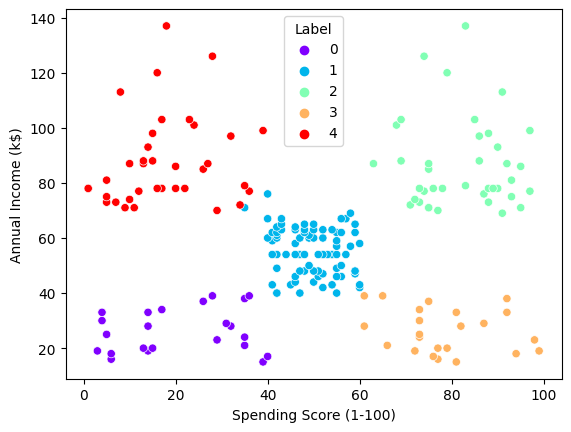

In [92]:

# erkannte cluster:
sns.scatterplot(data=df,x="Spending Score (1-100)",y="Annual Income (k$)",hue="Label",palette="rainbow")


<Axes: xlabel='Label', ylabel='Age'>

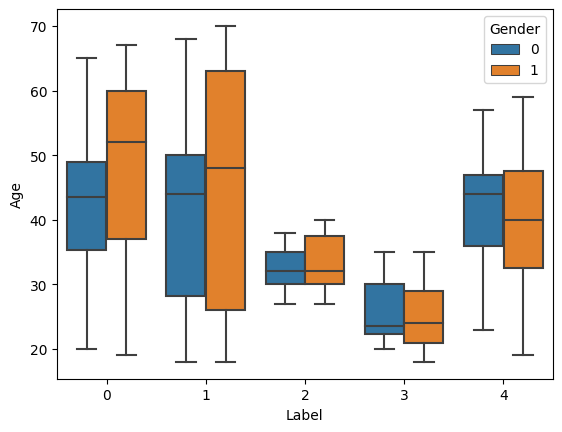

In [93]:

sns.boxplot(data=df,x="Label",y="Age",hue="Gender")
